In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [12]:
GSD10Pri = candels[-16]

delz = GSD10Pri[0]
nearby = GSD10Pri[1][1]
host = GSD10Pri[1][2]
lc = GSD10Pri[1][3]

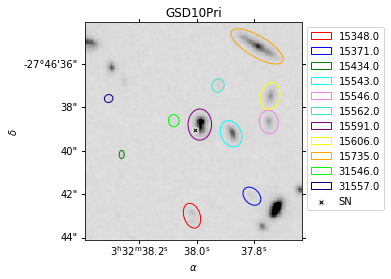

In [13]:
nick = GSD10Pri[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GSD10Pri[1][0]['RA'],GSD10Pri[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.016,val_max = .0525 )

In [14]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.mass[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))

  Seq   zbest zspec zphot zphot_l95 zphot_u95
------- ----- ----- ----- --------- ---------
15348.0 2.223 -99.0 2.223       2.0      2.47
15371.0 1.487 -99.0 1.487      1.19      2.02
15434.0   2.5 -99.0   2.5       0.2      3.43
15543.0  2.69 -99.0  2.69      2.57      2.84
15546.0 2.707 -99.0 2.707      2.26      5.65
15562.0 2.806 -99.0 2.806       2.4      3.16
15591.0 1.688 -99.0 1.688      1.53      1.84
15606.0 1.602 -99.0 1.602      1.44      1.78
15735.0   0.8 -99.0   0.8      0.68      0.92
31546.0  2.06 -99.0  2.06      0.18      4.31
31557.0  0.14 -99.0  0.14      0.03      3.37


## VLT+Xshooter spec for the clear host
## Don't need to update 
## Published http://www.stsci.edu/institute/stuc/oct-2013/Candels-Clash-SNe.pdf
## https://authors.library.caltech.edu/84630/1/Riess_2018_ApJ_853_126.pdf